# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<font color=green>

Introducción

Realizaremos un análisis preliminar sobre el comportamiento de clientes del 2018 de Megaline. El análisis será sobre la cantidad de llamadas hechas, mensajes de textos enviados, qué tarifan usan y de dónde son. Esto es para que el departamento comercial pueda saber cuál de los planes genera más ingresos y así para ajustar el presupuesto de publicidad.
    
La información de las tablas proporcionadas son las siguientes: 
    
La tabla calls (datos sobre las llamadas):
    
- id — identificador único de la llamada
- call_date — fecha de la llamada
- duration — duración de la llamada (en minutos)
- user_id — el identificador del usuario que realiza la llamada   
    
La tabla internet (datos sobre las sesiones web):

- id — identificador único de la sesión
- mb_used — el volumen de datos gastados durante la sesión (en megabytes)
- session_date — fecha de la sesión web
- user_id — identificador del usuario  
    
La tabla messages (datos sobre los SMS):

- id — identificador único del SMS
- message_date — fecha del SMS
- user_id — el identificador del usuario que manda el SMS    
    
La tabla plans (datos sobre las tarifas):

- plan_name — nombre de la tarifa
- usd_monthly_fee — pago mensual en dólares estadounidenses
- minutes_included — minutos incluidos al mes
- messages_included — SMS incluidos al mes
- mb_per_month_included — datos incluidos al mes (en megabytes)
- usd_per_minute — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
- usd_per_message — precio por SMS tras exceder los límites del paquete
- usd_per_gb — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)    
    
La tabla users (datos sobre los usuarios):
    
- user_id — identificador único del usuario    
- first_name — nombre del usuario    
- last_name — apellido del usuario    
- age — edad del usuario (en años)
- reg_date — fecha de suscripción (dd, mm, aa)
- churn_date — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
- city — ciudad de residencia del usuario
- plan — nombre de la tarifa    
   
    
    
    
    
</font>

## Inicialización

In [297]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

## Cargar los datos

In [298]:
# Carga los archivos de datos en diferentes DataFrames
try:
    megaline_calls = pd.read_csv('megaline_calls.csv')
except:
    megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')

try:
    megaline_internet = pd.read_csv('megaline_internet.csv')
except:
    megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
    
try:
    megaline_messages = pd.read_csv('megaline_messages.csv')
except:
    megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')

try:
    megaline_plans = pd.read_csv('megaline_plans.csv')
except:
    megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
    
try:
    megaline_users = pd.read_csv('megaline_users.csv')
except:
    megaline_users = pd.read_csv('/datasets/megaline_users.csv')    
    
    

## Preparar los datos

<font color=green>
Exploraremos cada tabla para tener una comprensión inicial de los datos y si es necesario, haremos correcciones necesarias a cada tabla    
    
</font>


## Planes

In [299]:
# Imprime la información general/resumen sobre el DataFrame de los planes
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [300]:
# Imprime una muestra de los datos para los planes
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<font color=green>
    Observamos los detalles de los dos planes que ofrece la empresa Megaline. No se ven detalles de falta de datos o tipos de datos erróneos.
  </font> 

## Corregir los datos

In [301]:
#cambiaremos el nombre de la columna 'plan_name' a 'plan' para tener todos con el mismo nombre de columna

megaline_plans = megaline_plans.rename(columns={"plan_name": "plan"})



In [302]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

## Usuarios

In [303]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [304]:
# Imprime una muestra de los datos para los usuarios
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [305]:
megaline_users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


 <font color=green>
    Observamos los detalles de los usuarios. Tendremos que corregir el formato de la columna reg_date. Y la columna churn_date, que tiene valores NaN, pero no sería problema porque quiere decir que la tarifa se estaba usando cuando se recuperaron estos datos. 
</font>

### Corregir datos

In [306]:
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%d')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format='%Y-%m-%d')

In [307]:
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


 <font color=green>
    Corregimos la columna reg_date y chunrd_date y la dejamos en formato datetime64.
</font>

### Enriquecer datos

In [308]:
#verificamos si tenemos datos duplicados
megaline_users['user_id'].duplicated().sum()

0

In [309]:
#verificamos y corregimos los datos ausentes
users_nan_perc = (megaline_users['churn_date'].isna().sum()/len(megaline_users))*100
users_nan_perc

93.2

 <font color=green>
    Tenemos un 93.2% de valores ausentes, o sea, solo el 6.8% no está vigente.
</font>

In [310]:
users_no_vigentes = pd.notnull(megaline_users['churn_date'])
megaline_users[users_no_vigentes]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


In [311]:
#reemplazaremos los NaN con un 0
# megaline_users['churn_date'] = megaline_users['churn_date'].fillna(0)
# megaline_users['churn_date'].isna().sum()

In [312]:
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [313]:
calls_expanded = megaline_users.loc[:,['user_id','age','city','plan']]
calls_expanded.head()

,user_id,age,city,plan
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,36,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,52,"Tulsa, OK MSA",surf
4,1004,40,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [314]:
calls_plans = megaline_plans.loc[:,['plan','minutes_included','usd_per_minute']]
calls_plans

,plan,minutes_included,usd_per_minute
0,surf,500,0.03
1,ultimate,3000,0.01


  <font color=green>
Con estas dos tablas, podemos crear una nueva tabla que contenga ambas.
</font>

## Llamadas

In [315]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [316]:
# Imprime una muestra de datos para llamadas
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [317]:
megaline_calls.tail()

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


  <font color=green>
    Obversamos la información y detalle de nuestro DataFrame de llamadas. Lo más notorio es que los datos de la columna: call_date es un object y necesitamos en formato datetime, que se puede arreglar. 
</font>

### Corregir datos

In [318]:
#corregimos al formato datetime
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%d')

In [319]:
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<font color=green>
    Cambiamos el tipo de la columna call_date al formato datetime
</font>

### Enriquecer datos

In [320]:
megaline_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [321]:
megaline_calls['id'].duplicated().sum()

0

In [322]:
megaline_calls['user_id'].duplicated().sum()

137254

<font color=green>
    El DataFrame de calls no presenta datos con valores NaN. La columna id no tiene duplicados. La columna user_id sí tiene duplicados, pero es netamente por los datos varios de id que corresponden al mismo usuario.
</font>

<font color=green>
Revisemos la columna duración ya que tenemos datos con valor 0 y cómo nos influye esto en nuestro análisis
</font>

In [323]:
megaline_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

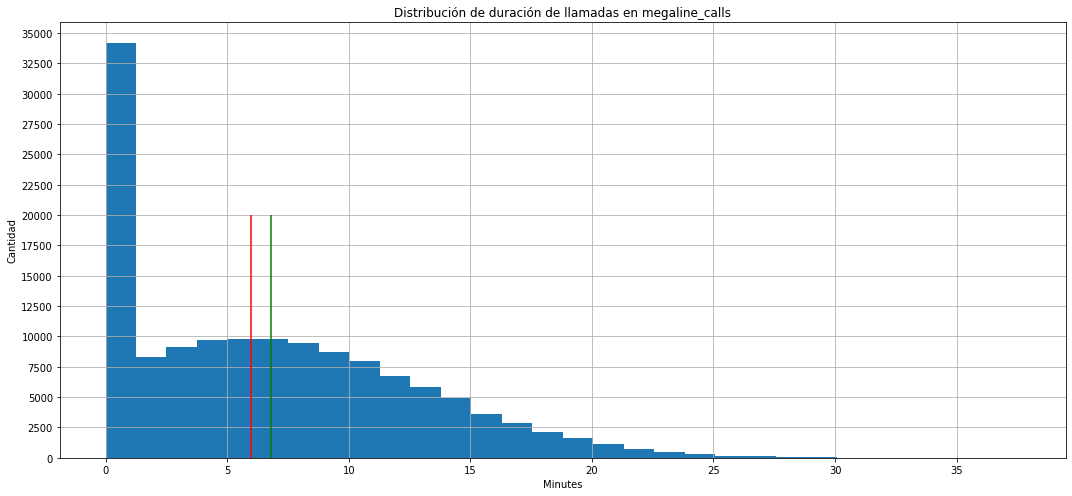

In [324]:
# Veamos como se comportan las llamadas según su duración
megaline_calls['duration'].hist(bins=30, figsize=(15,7))
# Marquemos la mediana en rojo
plt.vlines(6,ymin=0, ymax=20000, color='red')
# Marquemos la media en verde
plt.vlines(6.8,ymin=0, ymax=20000, color='green')
plt.yticks((np.arange(0, 35001, step=2500)))
plt.title('Distribución de duración de llamadas en megaline_calls')
plt.xlabel('Minutes')
plt.ylabel('Cantidad')
plt.show()

In [325]:
megaline_calls[megaline_calls['duration']!=0]['duration'].describe()

count    110901.000000
mean          8.378196
std           5.354567
min           0.010000
25%           4.150000
50%           7.710000
75%          11.820000
max          37.600000
Name: duration, dtype: float64

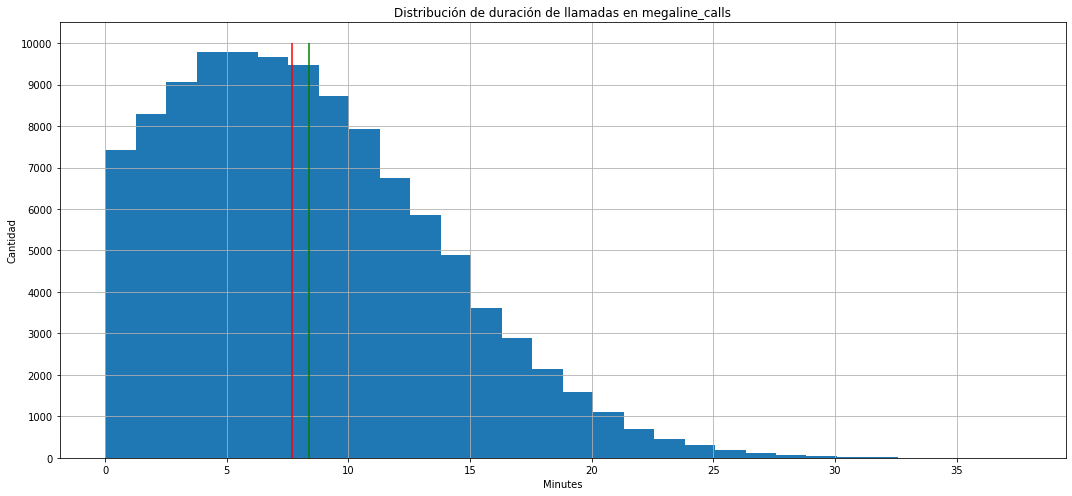

In [326]:
# Veamos como se comportan las llamadas según su duración nula
megaline_calls[megaline_calls['duration']!=0]['duration'].hist(bins=30, figsize=(15,7))
# Marquemos la mediana en rojo
plt.vlines(7.7,ymin=0, ymax=10000, color='red')
# Marquemos la media en verde
plt.vlines(8.4,ymin=0, ymax=10000, color='green')
plt.yticks((np.arange(0, 10001, step=1000)))
plt.title('Distribución de duración de llamadas en megaline_calls')
plt.xlabel('Minutes')
plt.ylabel('Cantidad')
plt.show()

Text(0, 0.5, 'Minutos')

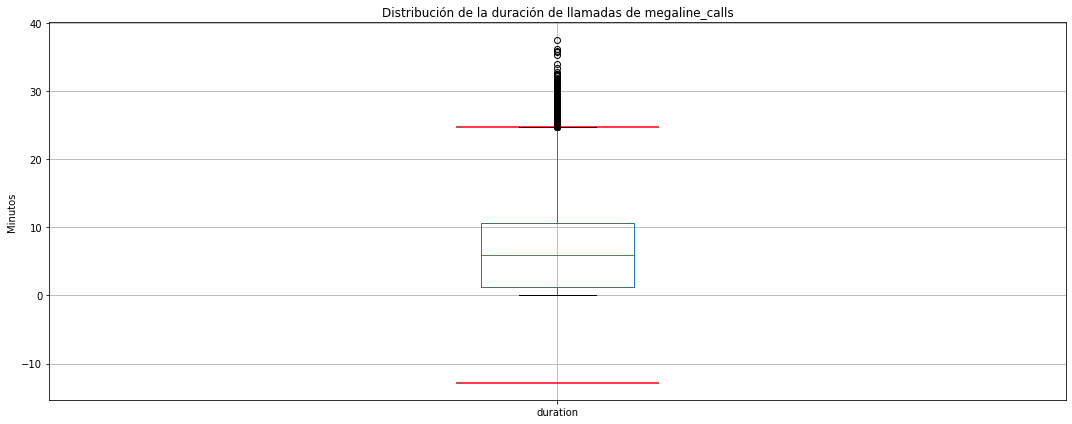

In [327]:
Q1_calls = megaline_calls['duration'].quantile(0.25)
Q3_calls = megaline_calls['duration'].quantile(0.75)
IQR_calls = Q3_calls - Q1_calls
megaline_calls.boxplot(column='duration', figsize=(15,6))
plt.hlines(y=(Q3_calls+1.5*IQR_calls), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_calls-1.5*IQR_calls), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de la duración de llamadas de megaline_calls')
plt.ylabel('Minutos')

Text(0, 0.5, 'Minutos')

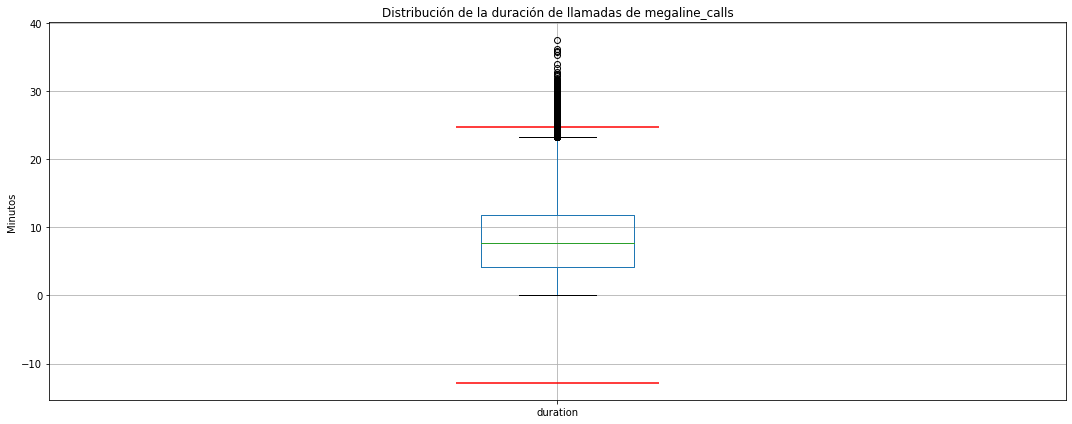

In [328]:
Q1 = megaline_calls['duration'].quantile(0.25)
Q3 = megaline_calls['duration'].quantile(0.75)
IQR = Q3 - Q1
megaline_calls[megaline_calls['duration']!=0].boxplot(column='duration', figsize=(15,6))
plt.hlines(y=(Q3+1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1-1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de la duración de llamadas de megaline_calls')
plt.ylabel('Minutos')

In [329]:
percentaje_of_ceros = (len(megaline_calls.query('duration == 0')) *100)/len(megaline_calls)
percentaje_of_ceros

19.48233927469416

<font color=green>    
    Haciendo los histogramas y los boxplot, podemos observar lo siguiente al respecto de la duración de llamadas con y sin 0 minutos: La media y mediana tienen una leve variación y el tercer quartil tiene casi nada de variación. Si bien, la cantidad de llamadas de duración 0 es casi un 20%, no podría tener impacto en el análisis de generación de ingresos para la empresa, no la eliminaremos y si es necesario, más adelante los trabajaremos.
</font>

In [330]:
#redondiemos la duración de las llamadas, creando una nueva columna:
megaline_calls['duration_round'] = np.ceil(megaline_calls['duration'])
# megaline_calls['duration_round'] = megaline_calls['duration'].apply(np.ceil)
megaline_calls.head()

,id,user_id,call_date,duration,duration_round
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


In [331]:
#Crearemos otra columna con el mes en el que se realizó la llamada
megaline_calls['month'] = pd.DatetimeIndex(megaline_calls['call_date']).month

# Veamos la tabla
megaline_calls.head()

,id,user_id,call_date,duration,duration_round,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


<font color=green>    
En esta tabla tenemos la cantidad de minutos ocupados por mes y a su vez, la cantidad de llamadas por cada mes.
</font>

In [332]:
#Estos nuevas tablas (DataFrame) nos servirán más adelante
calls_expanded = megaline_users.loc[:,['user_id','age','city','plan']]
calls_plans = megaline_plans.loc[:,['plan','minutes_included','usd_per_minute']]

## Mensajes

In [333]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [334]:
# Imprime una muestra de datos para los mensajes
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [335]:
megaline_messages.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


<font color=green>
    Observamos que no tenemos datos faltantes. Solamente la columna message_date habría que cambiarla al tipo datetime
</font>

### Corregir datos

In [336]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%d')
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer datos

In [337]:
megaline_messages['id'].duplicated().sum()

0

<font color=green>
    No se observan datos duplicados. Debiese ser el mismo caso como en DataFrame de calls.
</font>

In [338]:
#Estas dos variables las usaremos más abajo para el merge de estas.

messages_expanded = megaline_users.loc[:,['user_id','age','city','plan']]

messages_plans = megaline_plans.loc[:,['plan','messages_included','usd_per_message']]

## Internet

In [339]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [340]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [341]:
megaline_internet.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


 <font color=green>
    No se observa datos faltantes. Solamente la columna session_date se tendrá que cambiar al tipo datetime.
</font>

### Corregir datos

<font color=green>
Corregiremos el tipo de la columna session_date:
    
</font>

In [342]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%d')
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer datos

In [343]:
megaline_internet['id'].duplicated().sum()

0

<font color=green>
No tenemos duplicados en la columna id. Revisaremos la columna mb_used. Ya que como indicado, también se deben aproximarse, pero lo haremos de una manera diferente a la anterior
    
</font>

In [344]:
percent_of_ceros = (len(megaline_internet.query('mb_used == 0')) *100)/len(megaline_internet)
percent_of_ceros



13.11423801574052

<font color=green>
Tenemos un 13% de planes que tienen 0 mb usados de internet. Es menor que en duration, pero sigue siendo alto. Verifiquemos su distribución:
    
</font>

Text(0, 0.5, 'Megabytes')

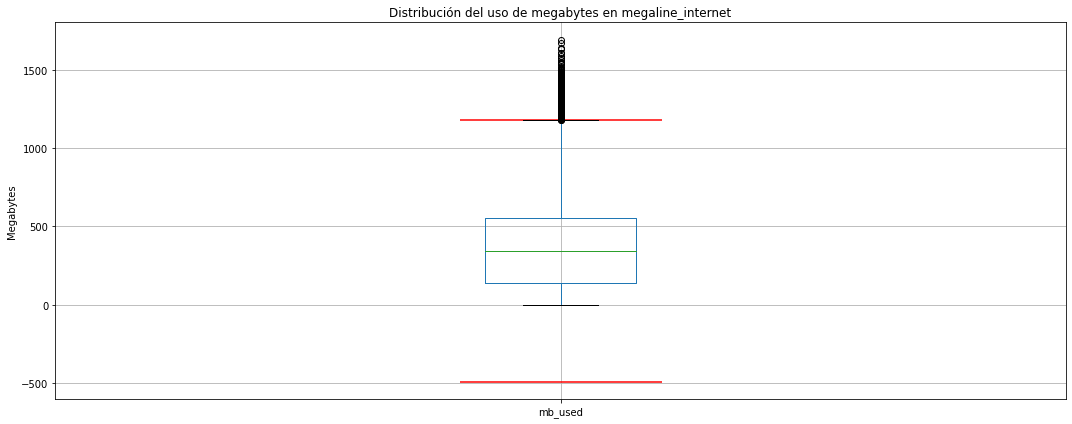

In [345]:
Q1_internet = megaline_internet['mb_used'].quantile(0.25)
Q3_internet = megaline_internet['mb_used'].quantile(0.75)
IQR_internet = Q3_internet - Q1_internet
megaline_internet.boxplot(column='mb_used', figsize=(15,6))
plt.hlines(y=(Q3_internet+1.5*IQR_internet), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_internet-1.5*IQR_internet), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución del uso de megabytes en megaline_internet')
plt.ylabel('Megabytes')

<font color=green>
Como podemos observar, nuestro bigote inferior está muy por debajo del 0. Guarderemos estos valores de momento.
    
</font>

<font color=green>
Primero, es regularizar todos los valores ya sea a megabytes o gigabytes. Como el precio extra está considerado por gigabyte lo mejor es homologar todo a este valor, ya que modificar el precio podría cambiar los valores. Primero crearemos una columna en megaline_plans que sea 'gb_per_month_included'    
</font>

In [346]:
megaline_plans['gb_per_month_included'] = megaline_plans['mb_per_month_included'] / 1024
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<font color=green>
Realizaremos lo mismo, pero en megaline_internet en la columna 'mb_used' creando una nueva columna 'gb_used':    
</font>

In [347]:
megaline_internet['gb_used'] = megaline_internet['mb_used'] / 1024

In [348]:
#Usaremos estas dos variables (DataFrames) para el merge más abajo.

internet_expanded = megaline_users.loc[:,['user_id','age','city','plan']]

internet_plans = megaline_plans.loc[:,['plan','gb_per_month_included','usd_per_gb']]


## Estudiar las condiciones del plan

In [349]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


In [350]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.


calls_by_user_by_month = megaline_calls.groupby(["user_id", "month"]).agg({"id": "count", "duration_round": "sum"}).reset_index()
calls_by_user_by_month.columns = ['user_id', 'month', 'number_of_calls', 'monthly_duration']
calls_by_user_by_month.head()


,user_id,month,number_of_calls,monthly_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [351]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
megaline_messages['month'] = pd.DatetimeIndex(megaline_messages['message_date']).month

messages_by_user_by_month = megaline_messages.groupby(["user_id", "month"]).agg({"id": "count"}).reset_index()
messages_by_user_by_month.columns = ['user_id', 'month', 'number_of_messages']


megaline_messages_count = megaline_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
megaline_messages_count.head()


id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36

In [352]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
megaline_internet['month'] = pd.DatetimeIndex(megaline_internet['session_date']).month

internet_by_user_by_month = megaline_internet.groupby(["user_id", "month"]).agg({"id": "count", "gb_used": "sum"}).reset_index()
internet_by_user_by_month.columns = ['user_id', 'month', 'number_of_sessions', 'monthly_gb_used']

#Aprovechamos de redondear los Gb usados al mes.
np.ceil(internet_by_user_by_month['monthly_gb_used'])
internet_by_user_by_month['monthly_gb_used'] = internet_by_user_by_month['monthly_gb_used'].round().astype('int')
#internet_by_user_by_month['monthly_gb_used'] = internet_by_user_by_month['monthly_gb_used'].apply(np.ceil).astype('int')

internet_by_user_by_month.head()

,user_id,month,number_of_sessions,monthly_gb_used
0,1000,12,5,2
1,1001,8,25,7
2,1001,9,53,13
3,1001,10,56,22
4,1001,11,51,18


In [126]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
calls_monthly = calls_expanded.merge(calls_plans, on='plan')
calls_monthly = calls_monthly.merge(calls_by_user_by_month, on='user_id')

#Agregamos una nueva columna los minutos extras
calls_monthly['extra_minutes'] = calls_monthly['monthly_duration'] - calls_monthly['minutes_included']

#Corregimos los números negativos, dejandolos en 0
calls_monthly['extra_minutes'] = np.where(calls_monthly['extra_minutes'] < 0, 0, calls_monthly['extra_minutes'])

#Agregamos la columna con el valor extra que pagó cada usuario
calls_monthly['extracalls_value'] = calls_monthly['extra_minutes'] * calls_monthly['usd_per_minute']
calls_monthly.head()

,user_id,age,city,plan,minutes_included,usd_per_minute,month,number_of_calls,monthly_duration,extra_minutes,extracalls_value
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,0.01,12,16,124.0,0.0,0.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,11,2,10.0,0.0,0.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,12,9,59.0,0.0,0.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,10,71,476.0,0.0,0.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,11,63,446.0,0.0,0.0


In [127]:
messages_monthly = messages_expanded.merge(messages_plans, on='plan')
messages_monthly = messages_monthly.merge(messages_by_user_by_month, on='user_id')

#Agregamos una nueva columna como 'extra_messages'
messages_monthly['extra_messages'] = messages_monthly['number_of_messages'] - messages_monthly['messages_included']

#Corregimos los números negativos, dejandolos en 0
messages_monthly['extra_messages'] = np.where(messages_monthly['extra_messages'] < 0, 0, messages_monthly['extra_messages'])

#Agregaremos una columna con el monto extra a pagar
messages_monthly['extramessages_value'] = messages_monthly['extra_messages'] * messages_monthly['usd_per_message']
messages_monthly.head()



,user_id,age,city,plan,messages_included,usd_per_message,month,number_of_messages,extra_messages,extramessages_value
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,0.01,12,11,0,0.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,0.01,11,15,0,0.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,0.01,12,139,0,0.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,0.01,10,21,0,0.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,0.01,11,37,0,0.0


In [128]:
internet_monthly = internet_expanded.merge(internet_plans, on='plan')
internet_monthly = internet_monthly.merge(internet_by_user_by_month, on='user_id')

#Agregamos una nueva columna con 'extra_gb'
internet_monthly['extra_gb'] = internet_monthly['monthly_gb_used'] - internet_monthly['gb_per_month_included']

#Corregimos los números negativos, dejandolos en 0
internet_monthly['extra_gb'] = np.where(internet_monthly['extra_gb'] < 0, 0, internet_monthly['extra_gb'])

#Agregaremos una columna con el monto extra a pagar
internet_monthly['extragigas_value'] = internet_monthly['extra_gb'] * internet_monthly['usd_per_gb']
internet_monthly.head()

,user_id,age,city,plan,gb_per_month_included,usd_per_gb,month,number_of_sessions,monthly_gb_used,extra_gb,extragigas_value
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,30.0,7,12,5,1,0.0,0.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,11,7,2,0.0,0.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,12,63,31,1.0,7.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,10,57,16,0.0,0.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,11,72,23,0.0,0.0


<font color=green>
Con estas tres tablas creadas, podremos realizar ejecutar un analisis sobre la cantidad de llamadas, megas y mensajes mensuelas. Con estas tres tablas en juntas, podremos comprender el comportamiento de los clientes y analizar los planes correspondientes, con el fin de poder a nuestra hipótesis inicial. Crearemos una nueva tabla (DataFrame) llamada megaline_monthly_revenue    
  
</font>


In [129]:
monthly_revenue_expanded = megaline_users.loc[:,['user_id','city','plan']]
monthly_revenue_plans = megaline_plans.loc[:,['plan','usd_monthly_pay']]
monthly_revenue = monthly_revenue_expanded.merge(monthly_revenue_plans, on='plan')
monthly_revenue.head()


,user_id,city,plan,usd_monthly_pay
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70
3,1011,"Cleveland-Elyria, OH MSA",ultimate,70
4,1013,"Knoxville, TN MSA",ultimate,70


<font color=green>
Ahora añadiremos las llamadas a nuestro primer DataFrame   
  
</font>

In [130]:
calls_revenue = calls_monthly.loc[:,['user_id','month','number_of_calls','extracalls_value','monthly_duration']]

monthly_revenue_calls = monthly_revenue.merge(calls_revenue, on='user_id')
monthly_revenue_calls.head()

,user_id,city,plan,usd_monthly_pay,month,number_of_calls,extracalls_value,monthly_duration
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,12,16,0.0,124.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,11,2,0.0,10.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,12,9,0.0,59.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,10,71,0.0,476.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,11,63,0.0,446.0


<font color=green>
Haremos los mismo, agregando los datos de internet 
  
</font>

In [131]:
internet_revenue = internet_monthly.loc[:,['user_id','month','number_of_sessions','monthly_gb_used','extragigas_value']]

monthly_revenue_internet = monthly_revenue.merge(internet_revenue, on='user_id')
monthly_revenue_internet.head()



,user_id,city,plan,usd_monthly_pay,month,number_of_sessions,monthly_gb_used,extragigas_value
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,12,5,1,0.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,11,7,2,0.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,12,63,31,7.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,10,57,16,0.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,11,72,23,0.0


<font color=green>
Haremos los mismo con los mensajes 
  
</font>

In [132]:
messages_revenue = messages_monthly.loc[:,['user_id','month','number_of_messages','extramessages_value']]

monthly_revenue_messages = monthly_revenue.merge(messages_revenue, on='user_id')
monthly_revenue_messages.head()

,user_id,city,plan,usd_monthly_pay,month,number_of_messages,extramessages_value
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,12,11,0.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,11,15,0.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,12,139,0.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,10,21,0.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,11,37,0.0


<font color=green>
Teniendo estas tres tablas, podremos unirlas en una
  
</font>

In [133]:
monthly_revenue = monthly_revenue_calls
monthly_revenue = monthly_revenue.merge(monthly_revenue_internet, on=['user_id', 'city', 'plan', 'usd_monthly_pay', 'month'], how='outer')
monthly_revenue = monthly_revenue.merge(monthly_revenue_messages, on=['user_id', 'city', 'plan', 'usd_monthly_pay', 'month'], how='outer')

monthly_revenue.head()

,user_id,city,plan,usd_monthly_pay,month,number_of_calls,extracalls_value,monthly_duration,number_of_sessions,monthly_gb_used,extragigas_value,number_of_messages,extramessages_value
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,12,16.0,0.0,124.0,5.0,1.0,0.0,11.0,0.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,11,2.0,0.0,10.0,7.0,2.0,0.0,15.0,0.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,12,9.0,0.0,59.0,63.0,31.0,7.0,139.0,0.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,10,71.0,0.0,476.0,57.0,16.0,0.0,21.0,0.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,11,63.0,0.0,446.0,72.0,23.0,0.0,37.0,0.0


In [134]:
#Comprobemos nuestro nuevo DataFrame
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2293 non-null   int64  
 1   city                 2293 non-null   object 
 2   plan                 2293 non-null   object 
 3   usd_monthly_pay      2293 non-null   int64  
 4   month                2293 non-null   int64  
 5   number_of_calls      2258 non-null   float64
 6   extracalls_value     2258 non-null   float64
 7   monthly_duration     2258 non-null   float64
 8   number_of_sessions   2277 non-null   float64
 9   monthly_gb_used      2277 non-null   float64
 10  extragigas_value     2277 non-null   float64
 11  number_of_messages   1806 non-null   float64
 12  extramessages_value  1806 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 250.8+ KB


<font color=green>
Observamos que tenemos varias columnas con datos faltantes. Estos se deben por los valores en 0. Rellenaremos estos.
  
</font>

In [135]:
monthly_revenue = monthly_revenue.fillna(0)
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2293 non-null   int64  
 1   city                 2293 non-null   object 
 2   plan                 2293 non-null   object 
 3   usd_monthly_pay      2293 non-null   int64  
 4   month                2293 non-null   int64  
 5   number_of_calls      2293 non-null   float64
 6   extracalls_value     2293 non-null   float64
 7   monthly_duration     2293 non-null   float64
 8   number_of_sessions   2293 non-null   float64
 9   monthly_gb_used      2293 non-null   float64
 10  extragigas_value     2293 non-null   float64
 11  number_of_messages   2293 non-null   float64
 12  extramessages_value  2293 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 250.8+ KB


<font color=green>
Con esto podremos calcular el ingreso mensual por cada usuario
  
</font>

In [136]:
# Calcula el ingreso mensual para cada usuario
monthly_revenue['total_revenue'] = monthly_revenue['usd_monthly_pay'] + monthly_revenue['extracalls_value'] + monthly_revenue['extragigas_value'] + monthly_revenue['extramessages_value']
monthly_revenue.head()

,user_id,city,plan,usd_monthly_pay,month,number_of_calls,extracalls_value,monthly_duration,number_of_sessions,monthly_gb_used,extragigas_value,number_of_messages,extramessages_value,total_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,12,16.0,0.0,124.0,5.0,1.0,0.0,11.0,0.0,70.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,11,2.0,0.0,10.0,7.0,2.0,0.0,15.0,0.0,70.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,12,9.0,0.0,59.0,63.0,31.0,7.0,139.0,0.0,77.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,10,71.0,0.0,476.0,57.0,16.0,0.0,21.0,0.0,70.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,11,63.0,0.0,446.0,72.0,23.0,0.0,37.0,0.0,70.0


<font color=green>
Ordenemos un poco la tabla de arriba

  
</font>

In [137]:
monthly_revenue = monthly_revenue[['user_id','city','month','plan','number_of_calls','monthly_duration','number_of_sessions','monthly_gb_used','number_of_messages','usd_monthly_pay','extracalls_value','extragigas_value','extramessages_value','total_revenue']]
monthly_revenue.head()

,user_id,city,month,plan,number_of_calls,monthly_duration,number_of_sessions,monthly_gb_used,number_of_messages,usd_monthly_pay,extracalls_value,extragigas_value,extramessages_value,total_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",12,ultimate,16.0,124.0,5.0,1.0,11.0,70,0.0,0.0,0.0,70.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",11,ultimate,2.0,10.0,7.0,2.0,15.0,70,0.0,0.0,0.0,70.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",12,ultimate,9.0,59.0,63.0,31.0,139.0,70,0.0,7.0,0.0,77.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",10,ultimate,71.0,476.0,57.0,16.0,21.0,70,0.0,0.0,0.0,70.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",11,ultimate,63.0,446.0,72.0,23.0,37.0,70,0.0,0.0,0.0,70.0


<font color=green>
Con la tabla más ordenada, estamos listos para poder analizar de mejor forma

  
</font>

## Estudia el comportamiento del usuario

<font color=green>
Primero partamos con una descripción general de la tabla

  
</font>

In [138]:
monthly_revenue.describe()

,user_id,month,number_of_calls,monthly_duration,number_of_sessions,monthly_gb_used,number_of_messages,usd_monthly_pay,extracalls_value,extragigas_value,extramessages_value,total_revenue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,60.067597,429.283471,45.715220,15.877453,33.166594,35.699956,1.264828,23.143916,0.144322,60.253022
std,143.051927,2.496386,32.402563,236.320077,19.587177,7.781499,34.070085,23.210863,3.233992,45.449935,0.493515,44.588093
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,38.000000,265.000000,35.000000,11.000000,3.000000,20.000000,0.000000,0.000000,0.000000,21.410000
50%,1245.000000,10.000000,60.000000,425.000000,48.000000,16.000000,26.000000,20.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,11.000000,79.000000,572.000000,58.000000,20.000000,51.000000,70.000000,0.000000,30.000000,0.000000,70.000000
max,1499.000000,12.000000,205.000000,1510.000000,138.000000,69.000000,266.000000,70.000000,30.300000,540.000000,6.480000,580.370000


<font color=green>
Analizando la descripción general de la tabla, podemos observar lo siguiente; los usuarios en promedio:
    
- Hacen 60 llamadas al mes.
- Abren 46 sesiones al mes.
- Envian 33 mensajes al mes.
- Gastan 64 Dolares al mes.
- Gastan 1.30 dolares extra al mes en llamadas.
- Gastan 27.24 dolares extra al mes en gigas.
- Gastan 0.14 dolares extra al mes en mensajes.
    

  
</font>

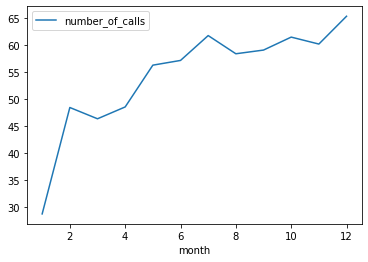

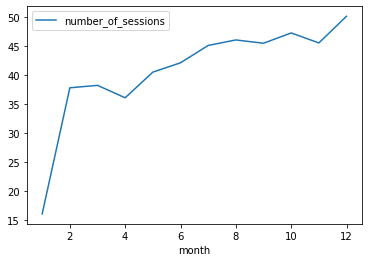

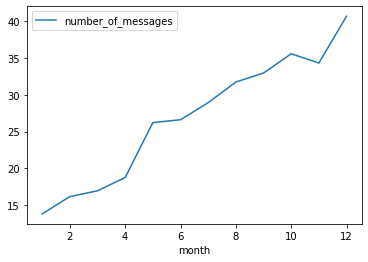

In [139]:
minutes_per_month = monthly_revenue.groupby('month').agg({'number_of_calls': 'mean'}).reset_index()
gigas_per_month = monthly_revenue.groupby('month').agg({'number_of_sessions': 'mean'}).reset_index()
messages_per_month = monthly_revenue.groupby('month').agg({'number_of_messages': 'mean'}).reset_index()



minutes_per_month.plot(kind="line", x="month", y="number_of_calls")
gigas_per_month.plot(kind="line", x="month", y="number_of_sessions")
messages_per_month.plot(kind="line", x="month", y="number_of_messages")

plt.show()



<font color=green>
Analizando los gráficos, podemos notar lo siguiente:

-En llamadas, observamos un salto grande de Enero a Febrero, una leve caída en Marzo y después aumentando hasta llegar a 65 en Diciembre.
- En el uso de internet, observamos algo parecido. Un incremento notorio entre Enero y Febrero. Una leve caída en Marzo y después aumentando paulativamente hasta llegar a Diciembre a 50.    
- En el envío de mensajes, observamos una diferencia. Los mensajes de Enero a Abril van subiendo paulativamente. Se pega un salto más grande e Abril a Mayo, casi se mantiene hasta Junio y sube hasta Octubre, donde tiene una caída leve en Noviembre. Pero en Diciembre aumenta de nuevo y llega a 40,
    

  
</font>

### Llamadas

In [140]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.


monthly_revenue.pivot_table(index= 'plan', columns = 'month', values = 'number_of_calls', aggfunc ='mean')

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,30.0,40.666667,46.434783,48.88000,55.701299,59.474227,63.157025,57.561728,58.108247,60.350211,59.120141,65.452830
ultimate,28.0,58.285714,46.000000,47.52381,57.586207,52.170213,58.694915,60.070423,61.046512,63.783019,62.362205,64.900662


<function matplotlib.pyplot.show(close=None, block=None)>

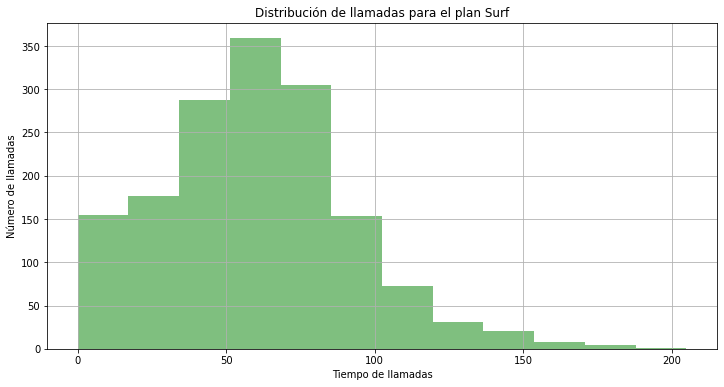

In [141]:
monthly_revenue.query('plan == "surf"').hist('number_of_calls', bins=12, color='green', alpha=0.5, figsize=(12, 6))
plt.xlabel('Tiempo de llamadas')
plt.ylabel('Número de llamadas')
plt.title('Distribución de llamadas para el plan Surf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

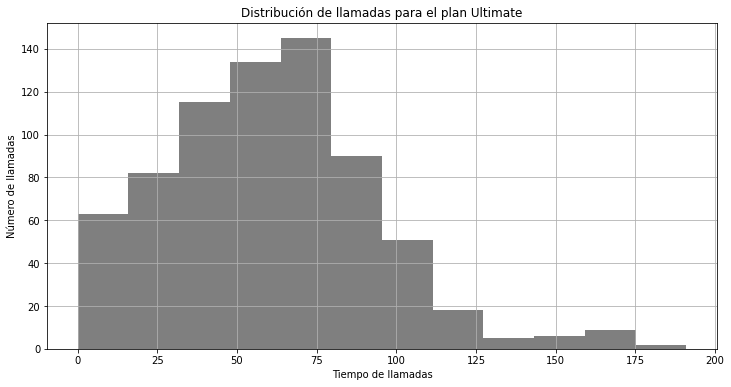

In [142]:
monthly_revenue.query('plan == "ultimate"').hist('number_of_calls', bins=12, color='black', alpha=0.5, figsize=(12, 6))
plt.xlabel('Tiempo de llamadas')
plt.ylabel('Número de llamadas')
plt.title('Distribución de llamadas para el plan Ultimate')
plt.show

In [143]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
monthly_revenue.pivot_table(index='plan',columns='month', values = 'monthly_duration', aggfunc='mean')


month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,203.0,297.000000,330.00,351.540000,399.584416,431.298969,449.983471,410.111111,414.226804,429.729958,423.325088,473.836478
ultimate,193.5,403.142857,304.25,336.857143,406.241379,370.957447,427.067797,421.436620,437.511628,450.735849,445.196850,459.099338


<function matplotlib.pyplot.show(close=None, block=None)>

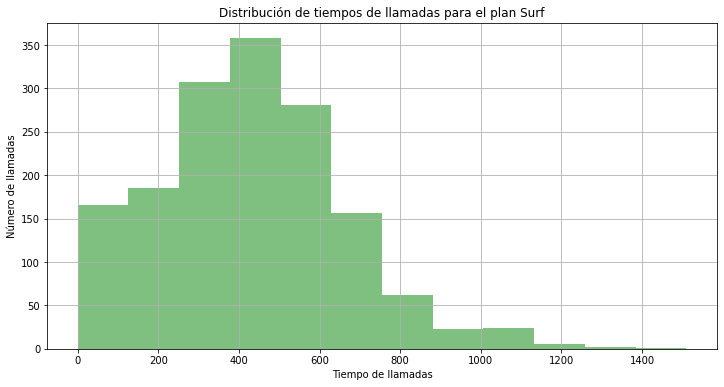

In [144]:
monthly_revenue.query('plan == "surf"').hist('monthly_duration', bins=12, color='green', alpha=0.5, figsize=(12, 6))
plt.xlabel('Tiempo de llamadas')
plt.ylabel('Número de llamadas')
plt.title('Distribución de tiempos de llamadas para el plan Surf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

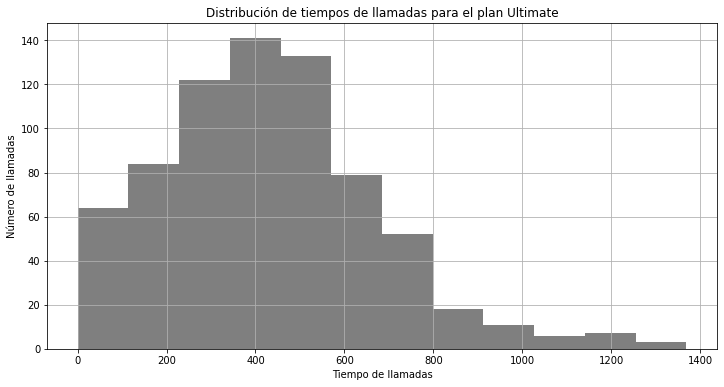

In [145]:
monthly_revenue.query('plan == "ultimate"').hist('monthly_duration', bins=12, color='black', alpha=0.5, figsize=(12, 6))
plt.xlabel('Tiempo de llamadas')
plt.ylabel('Número de llamadas')
plt.title('Distribución de tiempos de llamadas para el plan Ultimate')
plt.show

<font color=green>
Observamos que la cantidad de tiempos de llamadas en ambos planes son bastante parecido en su pico máximo que es 400 minutos.
    

  
</font>

In [146]:
# Calcula la media y la varianza de la duración mensual de llamadas.
surf_users = monthly_revenue[monthly_revenue['plan']=='surf']['user_id']
ultimate_users = monthly_revenue[monthly_revenue['plan']=='ultimate']['user_id']
call_surf = monthly_revenue.query('user_id in @surf_users')
call_ultimate = monthly_revenue.query('user_id in @ultimate_users')

print(f'la media de duración de llamada del plan surf es:',call_surf['monthly_duration'].median())
print(f'la varianza de duración de llamada del plan surf es:',call_surf['monthly_duration'].var())

print(f'la media de duración de llamada del plan ultimate es:',call_ultimate['monthly_duration'].median())
print(f'la varianza de duración de llamada del plan ultimate es:',call_ultimate['monthly_duration'].var())


la media de duración de llamada del plan surf es: 425.0
la varianza de duración de llamada del plan surf es: 54968.27946065038
la media de duración de llamada del plan ultimate es: 424.0
la varianza de duración de llamada del plan ultimate es: 57844.46481223922


Text(0.5, 1.0, 'Distribución de duración de llamadas plan Surf')

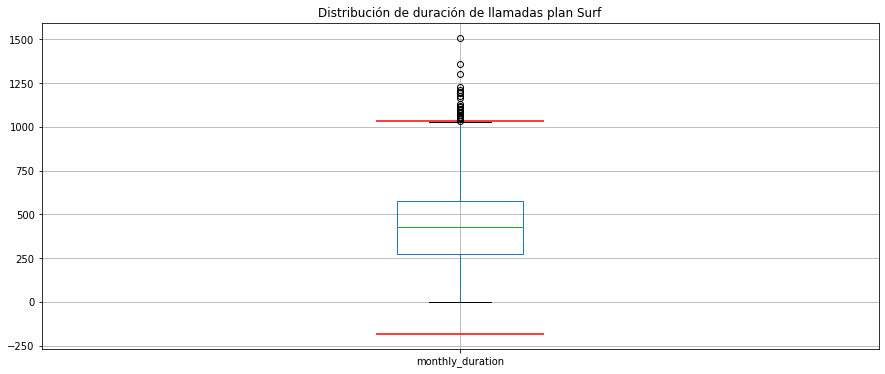

In [147]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
Q1_surf = call_surf['monthly_duration'].quantile(0.25)
Q3_surf = call_surf['monthly_duration'].quantile(0.75)
IQR_surf = Q3_surf - Q1_surf
call_surf.boxplot(column='monthly_duration', figsize=(15,6))
plt.hlines(y=(Q3_surf+1.5*IQR_surf), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_surf-1.5*IQR_surf), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de duración de llamadas plan Surf')


Text(0.5, 1.0, 'Distribución de duración de llamadas plan Ultimate')

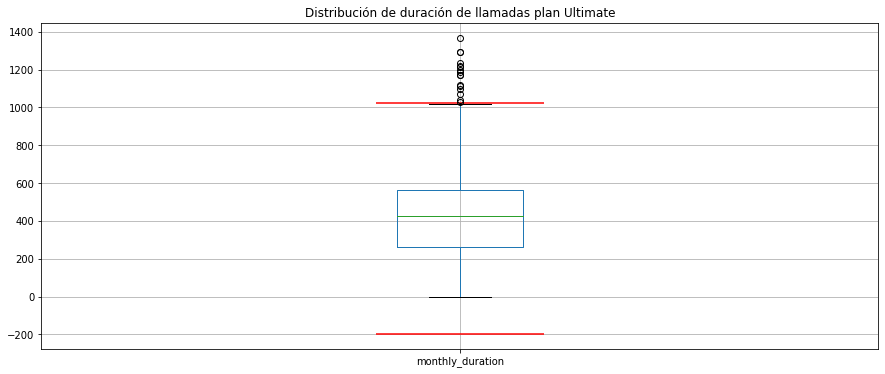

In [148]:
Q1_ultimate = call_ultimate['monthly_duration'].quantile(0.25)
Q3_ultimate = call_ultimate['monthly_duration'].quantile(0.75)
IQR_ultimate = Q3_ultimate - Q1_ultimate
call_ultimate.boxplot(column='monthly_duration', figsize=(15,6))
plt.hlines(y=(Q3_ultimate+1.5*IQR_ultimate), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_ultimate-1.5*IQR_ultimate), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de duración de llamadas plan Ultimate')

<font color=green>
Observamos que tanto la media como la varianza de ambos planes en llamadas, son parecidos.
  
</font>

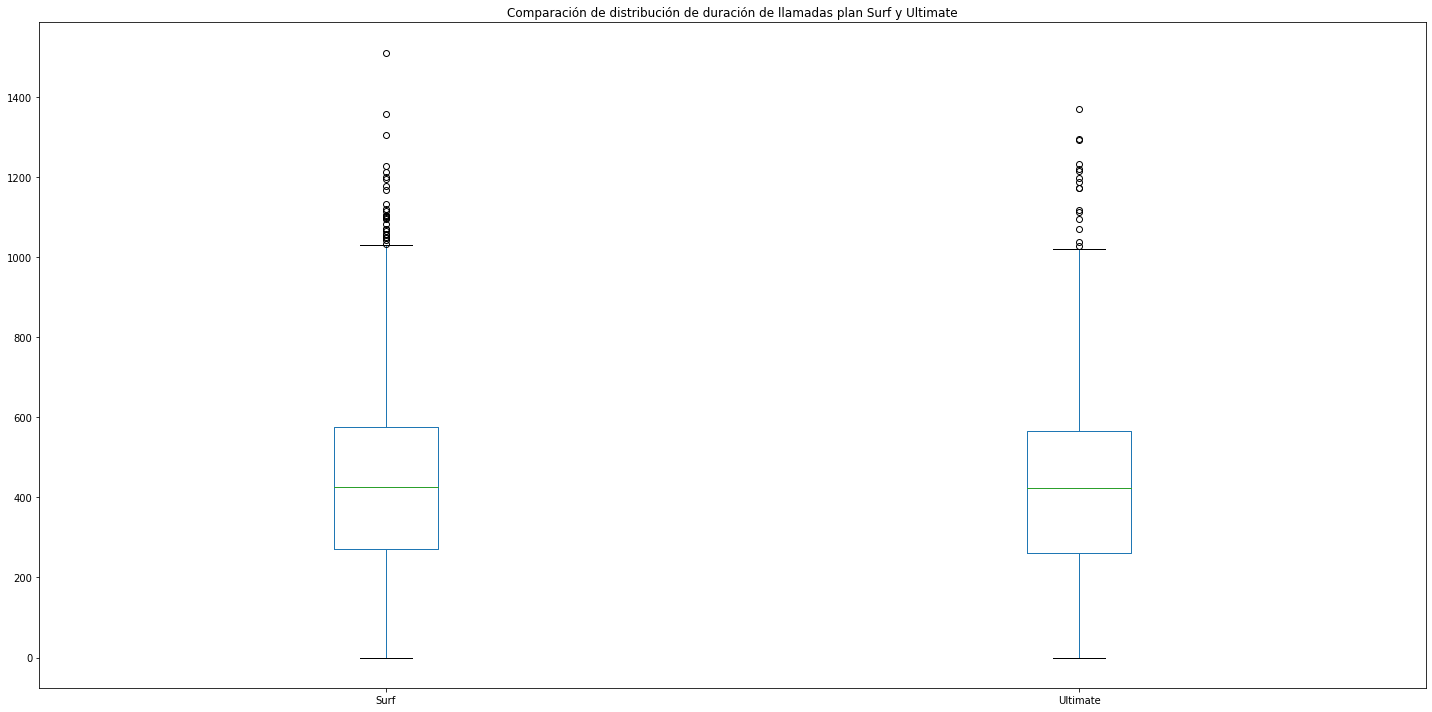

In [177]:
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True

data = pd.DataFrame({"Surf": call_surf['monthly_duration'], "Ultimate": call_ultimate['monthly_duration']})

ax = data[['Surf', 'Ultimate']].plot(kind='box', title='boxplot')
plt.title('Comparación de distribución de duración de llamadas plan Surf y Ultimate')

plt.show()

### Mensajes

In [149]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
monthly_revenue.pivot_table(index= 'plan', columns = 'month', values = 'number_of_messages', aggfunc ='mean')

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,10.5,12.000000,15.26087,17.400000,24.012987,25.298969,27.033058,28.777778,30.762887,33.839662,32.385159,38.600629
ultimate,15.5,21.571429,20.25000,22.047619,32.103448,29.340426,32.830508,38.478873,37.895349,39.443396,38.606299,45.006623


In [150]:
# Calcula la media y la varianza del número de mensajes que tienden a enviar los usuarios de cada plan.

surf_users = monthly_revenue[monthly_revenue['plan']=='surf']['user_id']
ultimate_users = monthly_revenue[monthly_revenue['plan']=='ultimate']['user_id']
message_surf = monthly_revenue.query('user_id in @surf_users')
message_ultimate = monthly_revenue.query('user_id in @ultimate_users')

print(f'la media de mensajes mensual de los usuarios del plan surf es:',message_surf['number_of_messages'].median())
print(f'la varianza de mensajes mensual de los usuarios del plan surf es:',message_surf['number_of_messages'].var())

print(f'la media de mensajes mensual de los usuarios del plan ultimate es:',message_ultimate['number_of_messages'].median())
print(f'la varianza de mensajes mensual de los usuarios del plan ultimate es:',message_ultimate['number_of_messages'].var())


la media de mensajes mensual de los usuarios del plan surf es: 24.0
la varianza de mensajes mensual de los usuarios del plan surf es: 1126.7245219504066
la media de mensajes mensual de los usuarios del plan ultimate es: 30.0
la varianza de mensajes mensual de los usuarios del plan ultimate es: 1208.756743548138


Text(0.5, 1.0, 'Distribución de mensajes del plan Surf')

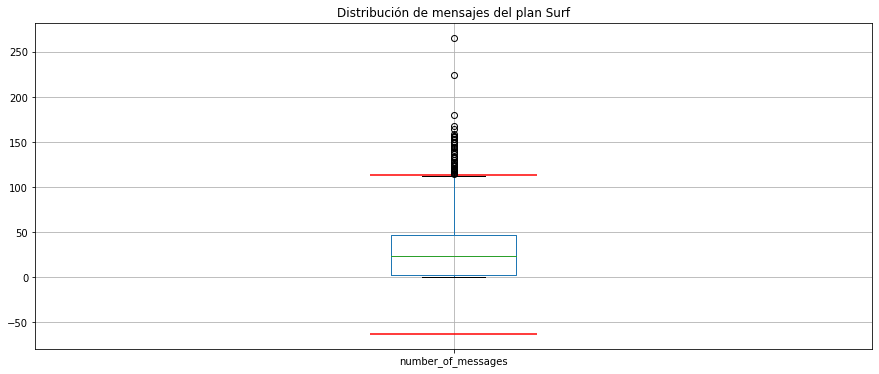

In [151]:
# Trazaremos un diagrama de caja para visualizar la distribución mensajes mensuales de ambos planes independientes.
Q1_surf_messages = call_surf['number_of_messages'].quantile(0.25)
Q3_surf_messages = call_surf['number_of_messages'].quantile(0.75)
IQR_surf_messages = Q3_surf_messages - Q1_surf_messages
call_surf.boxplot(column='number_of_messages', figsize=(15,6))
plt.hlines(y=(Q3_surf_messages+1.5*IQR_surf_messages), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_surf_messages-1.5*IQR_surf_messages), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de mensajes del plan Surf')

Text(0.5, 1.0, 'Distribución de mensajes del plan Ultimate')

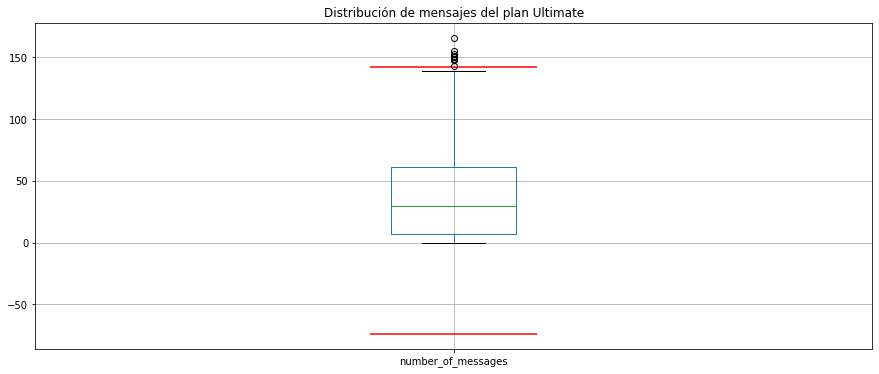

In [152]:
Q1_ultimate_messages = call_ultimate['number_of_messages'].quantile(0.25)
Q3_ultimate_messages = call_ultimate['number_of_messages'].quantile(0.75)
IQR_ultimate_messages = Q3_ultimate_messages - Q1_ultimate_messages
call_ultimate.boxplot(column='number_of_messages', figsize=(15,6))
plt.hlines(y=(Q3_ultimate_messages+1.5*IQR_ultimate_messages), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_ultimate_messages-1.5*IQR_ultimate_messages), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de mensajes del plan Ultimate')

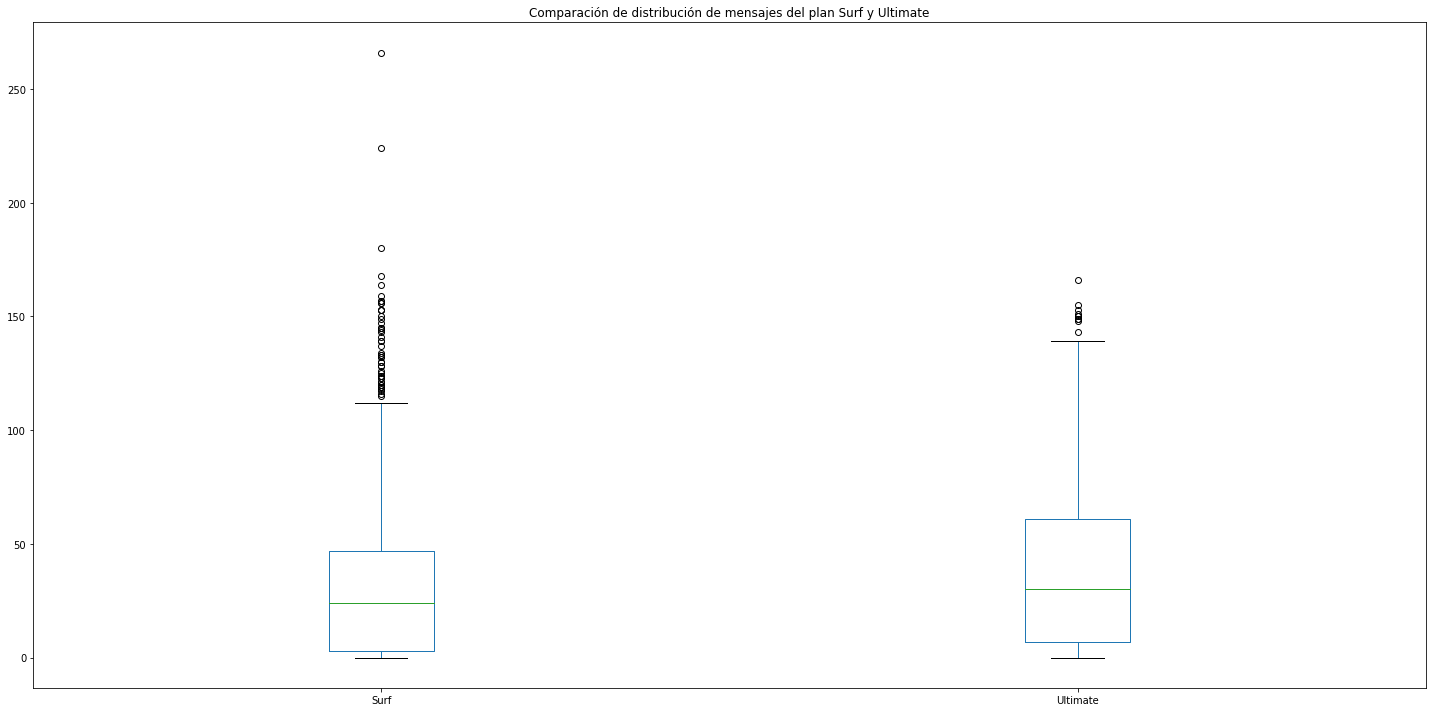

In [176]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

data = pd.DataFrame({"Surf": call_surf['number_of_messages'], "Ultimate": call_ultimate['number_of_messages']})

ax = data[['Surf', 'Ultimate']].plot(kind='box', title='boxplot')
plt.title('Comparación de distribución de mensajes del plan Surf y Ultimate')

plt.show()

In [153]:
monthly_revenue['monthly_gb_used'].head()

0     1.0
1     2.0
2    31.0
3    16.0
4    23.0
Name: monthly_gb_used, dtype: float64

<font color=green>
Al igual como en las llamadas, los mensajes en la media y varianza, son bastante parecidos para ambos planes.
  
</font>

### Internet

In [154]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
monthly_revenue.pivot_table(index= 'plan', columns = 'month', values = 'monthly_gb_used', aggfunc ='mean')

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,4.00,11.222222,12.565217,11.240000,13.129870,14.505155,15.884298,15.901235,15.695876,16.421941,15.438163,17.242138
ultimate,6.25,16.285714,17.416667,15.333333,15.862069,14.425532,15.491525,16.845070,16.011628,16.726415,16.118110,17.397351


In [155]:
# Calcula la media y la varianza del tráfico de internet consumido los usuarios de cada plan.

surf_users = monthly_revenue[monthly_revenue['plan']=='surf']['user_id']
ultimate_users = monthly_revenue[monthly_revenue['plan']=='ultimate']['user_id']
internet_surf = monthly_revenue.query('user_id in @surf_users')
internet_ultimate = monthly_revenue.query('user_id in @ultimate_users')

print(f'la media de internet usado mensual de los usuarios del plan surf es:',internet_surf['monthly_gb_used'].median())
print(f'la varianza de internet usado mensual de los usuarios del plan surf es:',internet_surf['monthly_gb_used'].var())

print(f'la media de internet usado mensual de los usuarios del plan ultimate es:',internet_ultimate['monthly_gb_used'].median())
print(f'la varianza de internet usado mensual de los usuarios del plan ultimate es:',internet_ultimate['monthly_gb_used'].var())

la media de internet usado mensual de los usuarios del plan surf es: 16.0
la varianza de internet usado mensual de los usuarios del plan surf es: 61.27490783562955
la media de internet usado mensual de los usuarios del plan ultimate es: 16.0
la varianza de internet usado mensual de los usuarios del plan ultimate es: 58.78379694019472


Text(0.5, 1.0, 'Distribución de tráfico de internet del plan Surf')

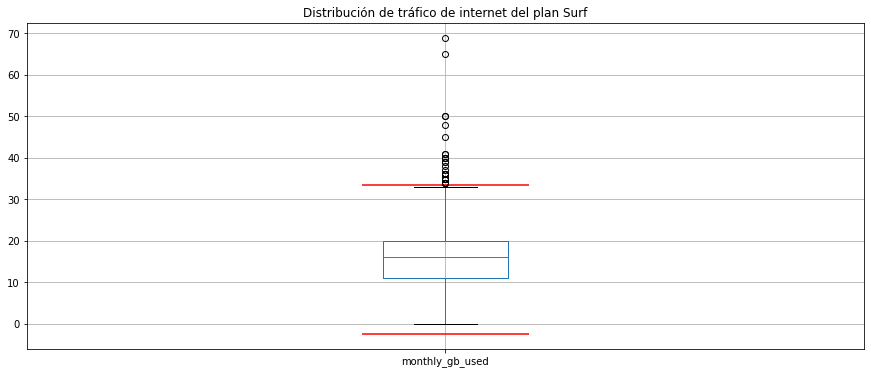

In [156]:
# Traza un diagrama de caja para visualizar la distribución de tráfico de internet por plan.
Q1_surf_internet = internet_surf['monthly_gb_used'].quantile(0.25)
Q3_surf_internet = internet_surf['monthly_gb_used'].quantile(0.75)
IQR_surf_internet = Q3_surf_internet - Q1_surf_internet
internet_surf.boxplot(column='monthly_gb_used', figsize=(15,6))
plt.hlines(y=(Q3_surf_internet+1.5*IQR_surf_internet), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_surf_internet-1.5*IQR_surf_internet), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de tráfico de internet del plan Surf')

Text(0.5, 1.0, 'Distribución de tráfico de internet del plan Ultimate')

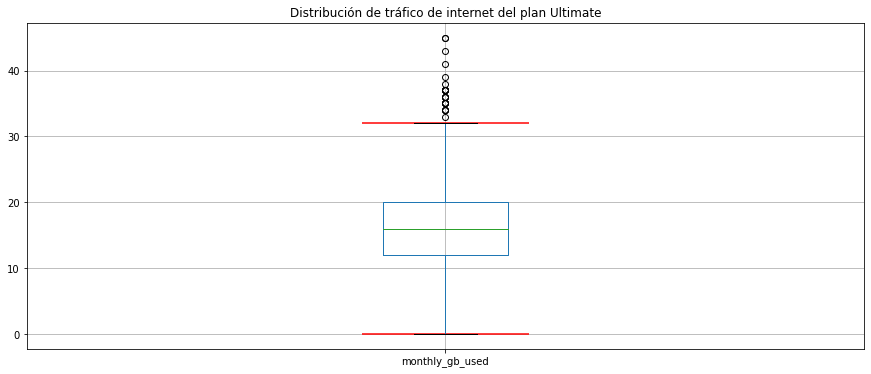

In [157]:
Q1_ultimate_internet = internet_ultimate['monthly_gb_used'].quantile(0.25)
Q3_ultimate_internet = internet_ultimate['monthly_gb_used'].quantile(0.75)
IQR_ultimate_internet = Q3_ultimate_internet - Q1_ultimate_internet
internet_ultimate.boxplot(column='monthly_gb_used', figsize=(15,6))
plt.hlines(y=(Q3_ultimate_internet+1.5*IQR_ultimate_internet), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_ultimate_internet-1.5*IQR_ultimate_internet), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de tráfico de internet del plan Ultimate')

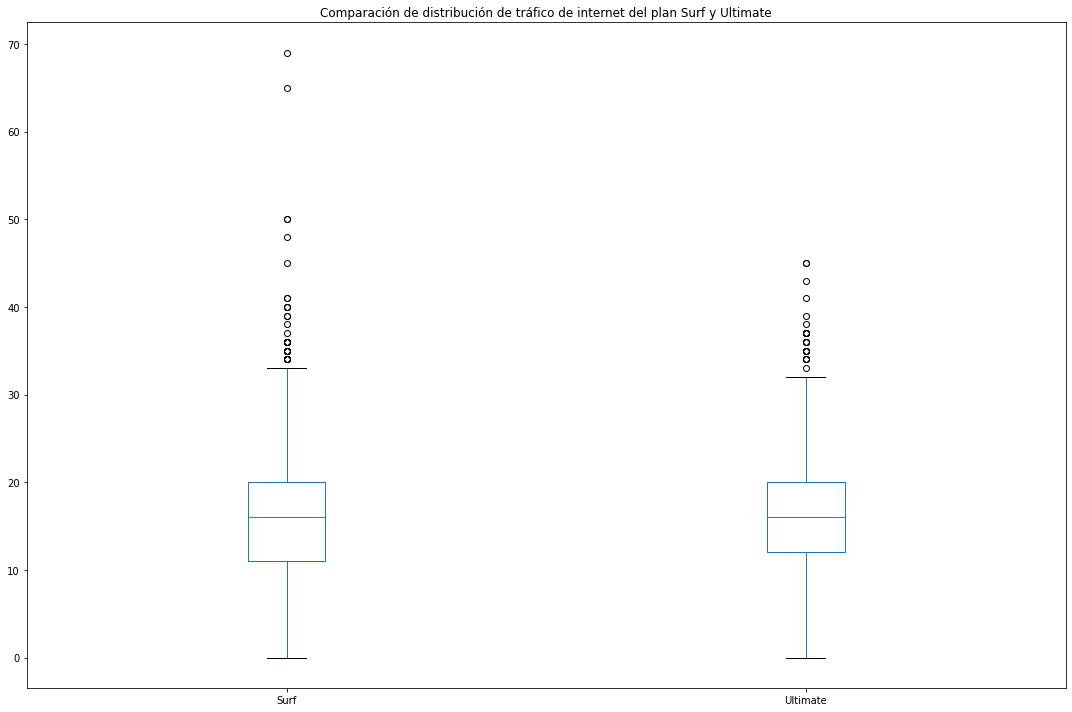

In [175]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

data = pd.DataFrame({"Surf": call_surf['monthly_gb_used'], "Ultimate": call_ultimate['monthly_gb_used']})

ax = data[['Surf', 'Ultimate']].plot(kind='box', title='boxplot')
plt.title('Comparación de distribución de tráfico de internet del plan Surf y Ultimate')

plt.show()

<font color=green>
En lo que es el tráfico de internet, la media es la misma de ambos planes y la varianza son muy parecidos.
</font>

## Ingreso

In [158]:
# Compara el ingreso promedio por plan
monthly_revenue.pivot_table(index= 'plan', columns = 'month', values = 'total_revenue', aggfunc ='mean')

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,20.0,29.952222,41.158696,37.310600,43.732078,44.121649,56.640992,58.252160,52.343660,59.218692,52.491908,63.764591
ultimate,70.0,70.000000,72.916667,72.333333,70.482759,71.340426,71.661017,72.464789,71.627907,71.915094,71.433071,72.781457


In [159]:
# Calcula la media y la varianza del ingreso de cada plan.

surf_users = monthly_revenue[monthly_revenue['plan']=='surf']['user_id']
ultimate_users = monthly_revenue[monthly_revenue['plan']=='ultimate']['user_id']
income_surf = monthly_revenue.query('user_id in @surf_users')
income_ultimate = monthly_revenue.query('user_id in @ultimate_users')

print(f'la media de ingreso del plan surf es:',internet_surf['total_revenue'].median())
print(f'la varianza de ingreso del plan surf es:',internet_surf['total_revenue'].var())

print(f'la media de ingreso del plan ultimate es:',internet_ultimate['total_revenue'].median())
print(f'la varianza de ingreso del plan ultimate es:',internet_ultimate['total_revenue'].var())

la media de ingreso del plan surf es: 31.8
la varianza de ingreso del plan surf es: 2761.2670620334557
la media de ingreso del plan ultimate es: 70.0
la varianza de ingreso del plan ultimate es: 101.89128225931078


Text(0.5, 1.0, 'Distribución de income del plan Surf')

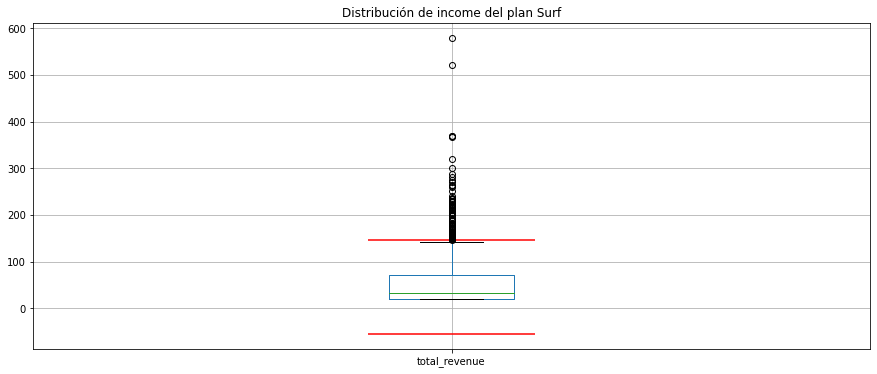

In [160]:
# Traza un diagrama de caja para visualizar la distribución de ingreso por plan.
Q1_surf_income = income_surf['total_revenue'].quantile(0.25)
Q3_surf_income = income_surf['total_revenue'].quantile(0.75)
IQR_surf_income = Q3_surf_income - Q1_surf_income
income_surf.boxplot(column='total_revenue', figsize=(15,6))
plt.hlines(y=(Q3_surf_income+1.5*IQR_surf_income), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_surf_income-1.5*IQR_surf_income), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de income del plan Surf')

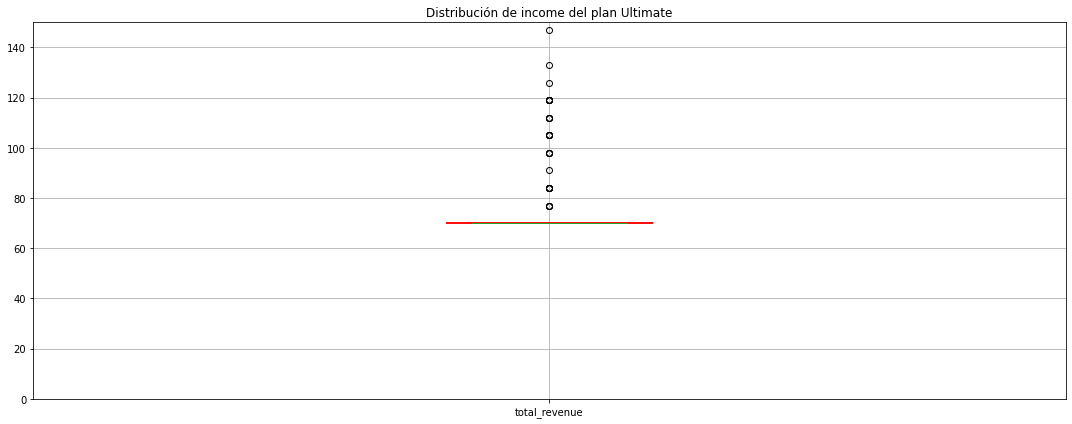

In [178]:
Q1_ultimate_income = income_ultimate['total_revenue'].quantile(0.25)
Q3_ultimate_income = income_ultimate['total_revenue'].quantile(0.75)
IQR_ultimate_income = Q3_ultimate_income - Q1_ultimate_income
income_ultimate.boxplot(column='total_revenue', figsize=(15,6))
plt.hlines(y=(Q3_ultimate_income+1.5*IQR_ultimate_income), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1_ultimate_income-1.5*IQR_ultimate_income), xmin=0.9, xmax=1.1, color='red')
plt.ylim(0, 150)
plt.title('Distribución de income del plan Ultimate')
plt.show()

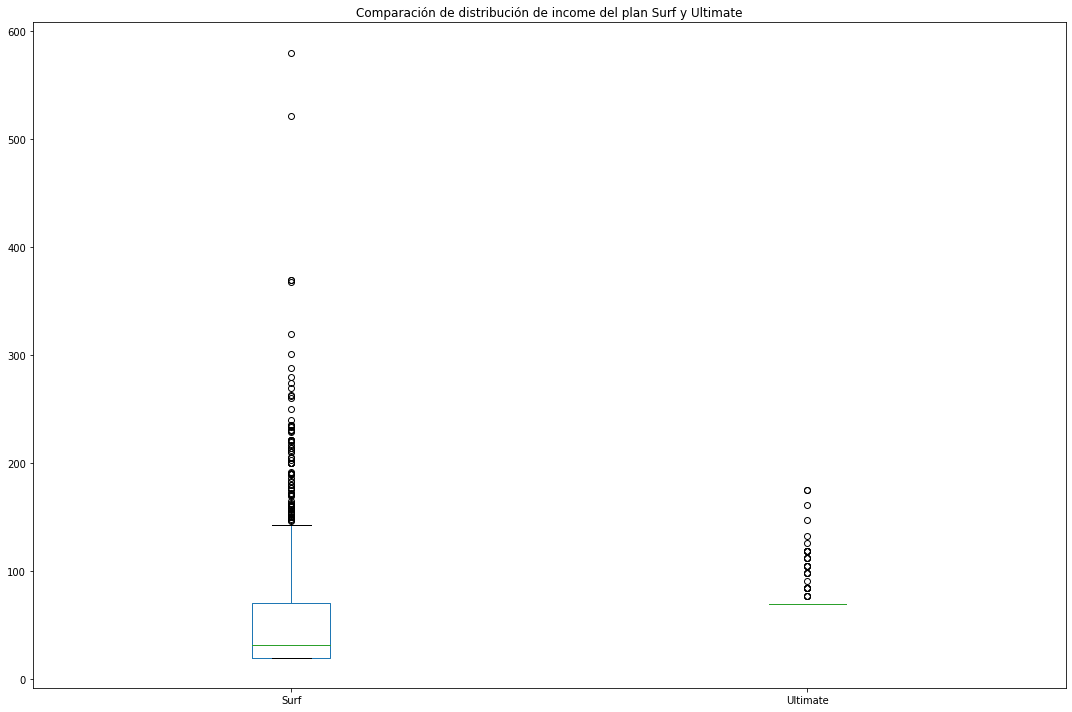

In [179]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

data = pd.DataFrame({"Surf": income_surf['total_revenue'], "Ultimate": income_ultimate['total_revenue']})

ax = data[['Surf', 'Ultimate']].plot(kind='box', title='boxplot')
plt.title('Comparación de distribución de income del plan Surf y Ultimate')

plt.show()

<font color=green>
Respecto a los ingresos según el plan. Podemos observar que el Plan Ultimate tiene mayor ingreso en promedio y media, comparando con el plan Surf. Siendo Surf el que tiene mayor varianza.
</font>

## Probar las hipótesis estadísticas.

In [180]:
# Prueba las hipótesis
#primero fijamos el valor de alpha en 5%
alpha = 0.05
#después seteamos las muestras:
sample_1 = income_surf['total_revenue']
sample_2 = income_ultimate['total_revenue']

#realicemos el testo:
results = st.ttest_ind(sample_1, sample_2)

# Vemos el resultado
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula, los ingresos promedio son diferentes.')
else:
    print('No rechazamos la hipótesis nula, los ingresos promedio son iguales.')

p-value: 1.3619502063682368e-17
Rechazamos la hipótesis nula, los ingresos promedio son diferentes.


<font color=green>
Como era de esperarse, el ingreso del plan Surf y Ultimate es diferente.
</font>

In [181]:
#Antes de poder elaborar la segunda hipótesis en los estados diferentes, debemos tomar el área correspondiente:
NY_NJ_users = megaline_users[megaline_users['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['user_id']

# Agrupamos a todos los usuarios
income_full = income_surf.append(income_ultimate)

# Volvemos a separar a los clientes, esta vez según su área
income_ny_nj = income_full.query("user_id in @NY_NJ_users")
income_not_ny_nj = income_full.query("not(user_id in @NY_NJ_users)")

<font color=green>
Teniendo nuestros dos DataFrame, podemos proseguir con la segunda prueba de hipótesis
</font>

In [182]:
# Prueba las hipótesis
# Fijamos las muestras
sample1 = income_ny_nj['total_revenue']
sample2 = income_not_ny_nj['total_revenue']

# Realizamos el test
results = st.ttest_ind(sample1, sample2)

# Vemos el resultado
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula, los ingresos promedio son diferentes.')
else:
    print('No rechazamos la hipótesis nula, los ingresos promedio son iguales.')

p-value: 0.01197008019863511
Rechazamos la hipótesis nula, los ingresos promedio son diferentes.


## Conclusión general

<font color=green>
    
Durante este proyecto notamos que en los 5 datasets obtenidos, los cuales contenían datos de 500 clientes de Megaline. Los cuales analizamos, corregimos y enriqusimos.
    

Los 500 clientes de Megaline, se dividen en dos planes: Surf y Ultimate. Nuestro objetivo es concluir cuál de estos dos planes genera el mayor ingreso, para que el departamento comercial pueda tomar la decisión para ajustar el presupuesto de publicidad.
    
Primero partimos con familiarnos con los 5 datasets. Después analizar, limpiar, corregir y agregar datos necesarios. El mayor detalle que pudimos observar, es que las fechas no estaban en formato DateTime, que debe ser por la forma que se ingresan. Pudiendo solucionarlo rápidamente. También vimos que hubo muchas llamadas 0, que las dejamos, porque no iban a influir mucho en nuestro análisis. También agregamos la información de los excesos en llamadas, internet y mensajes y la suma del valor total de estos. 
    

    

    

</font>